# Машинное обучение, DS-поток, осень 2022
## Задание 3.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 20 баллов;
* Задача 3 &mdash; 150 баллов;
* Задача 4 &mdash; 10 баллов;
* Задача 5 &mdash; 80 баллов.

----

In [54]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from scipy import special


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("dark")
sns.set(font_scale=1.6)

from time import time
from numpy import linalg as lg
import random
from tqdm.auto import tqdm

## Задача 1

Во взвешенном методе наименьших квадратов каждому наблюдению задается неко-
торый известный вес $w_i$. Задача имеет вид $\sum\limits_{i=1}^n w_i(Y_i - x_i^T\theta)^2 \rightarrow \min\limits_\theta$. Найдите решение
задачи в матричном виде.

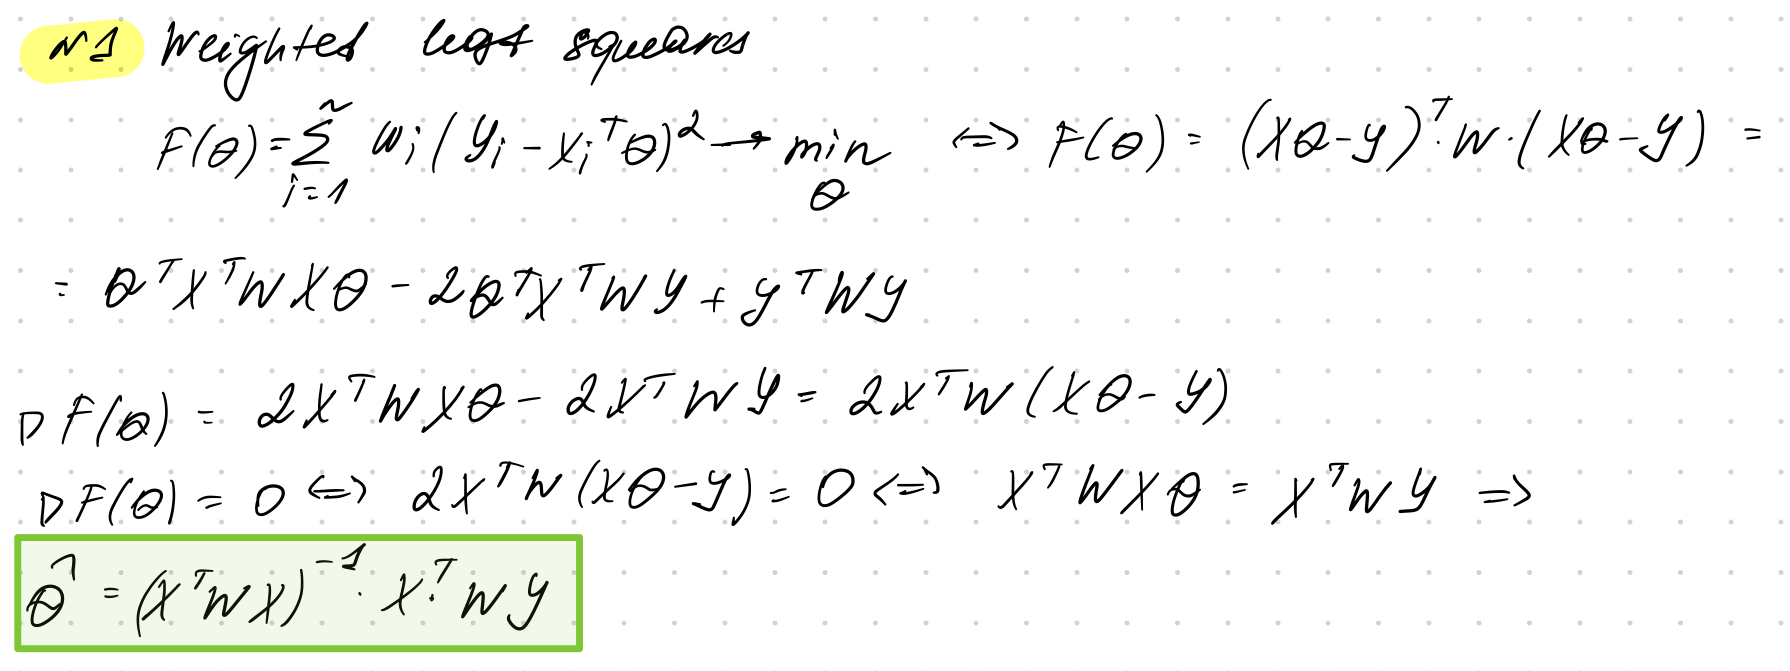

## Задача 2

Рассмотрим логистическую регрессию. Пусть $\large{x_i \in \mathbb{R}^d, Y_i \sim Bern(\mu_\theta(x_i))}$. 

Мы предполагаем, что $\large{\mu_\theta(x_i) = P_\theta(Y_i = 1)  = \sigma(x_i^T\theta)= \cfrac{e^{x_i^T\theta}}{1 + e^{x_i^T\theta}}}$.

Зададим регуляризацию через минимизацию следующего функционала:
$$\large{F(\theta) = -\ell_{X, Y}(\theta) + \lambda ||\theta||_2^2},$$

где $\large{\ell_{X, Y}(\theta)}$ &mdash; логарифмическая функция правдоподобия

1. Опишите процесс оптимизации методами GD и SGD.
2. Опишите процесс оптимизации методом IRLS

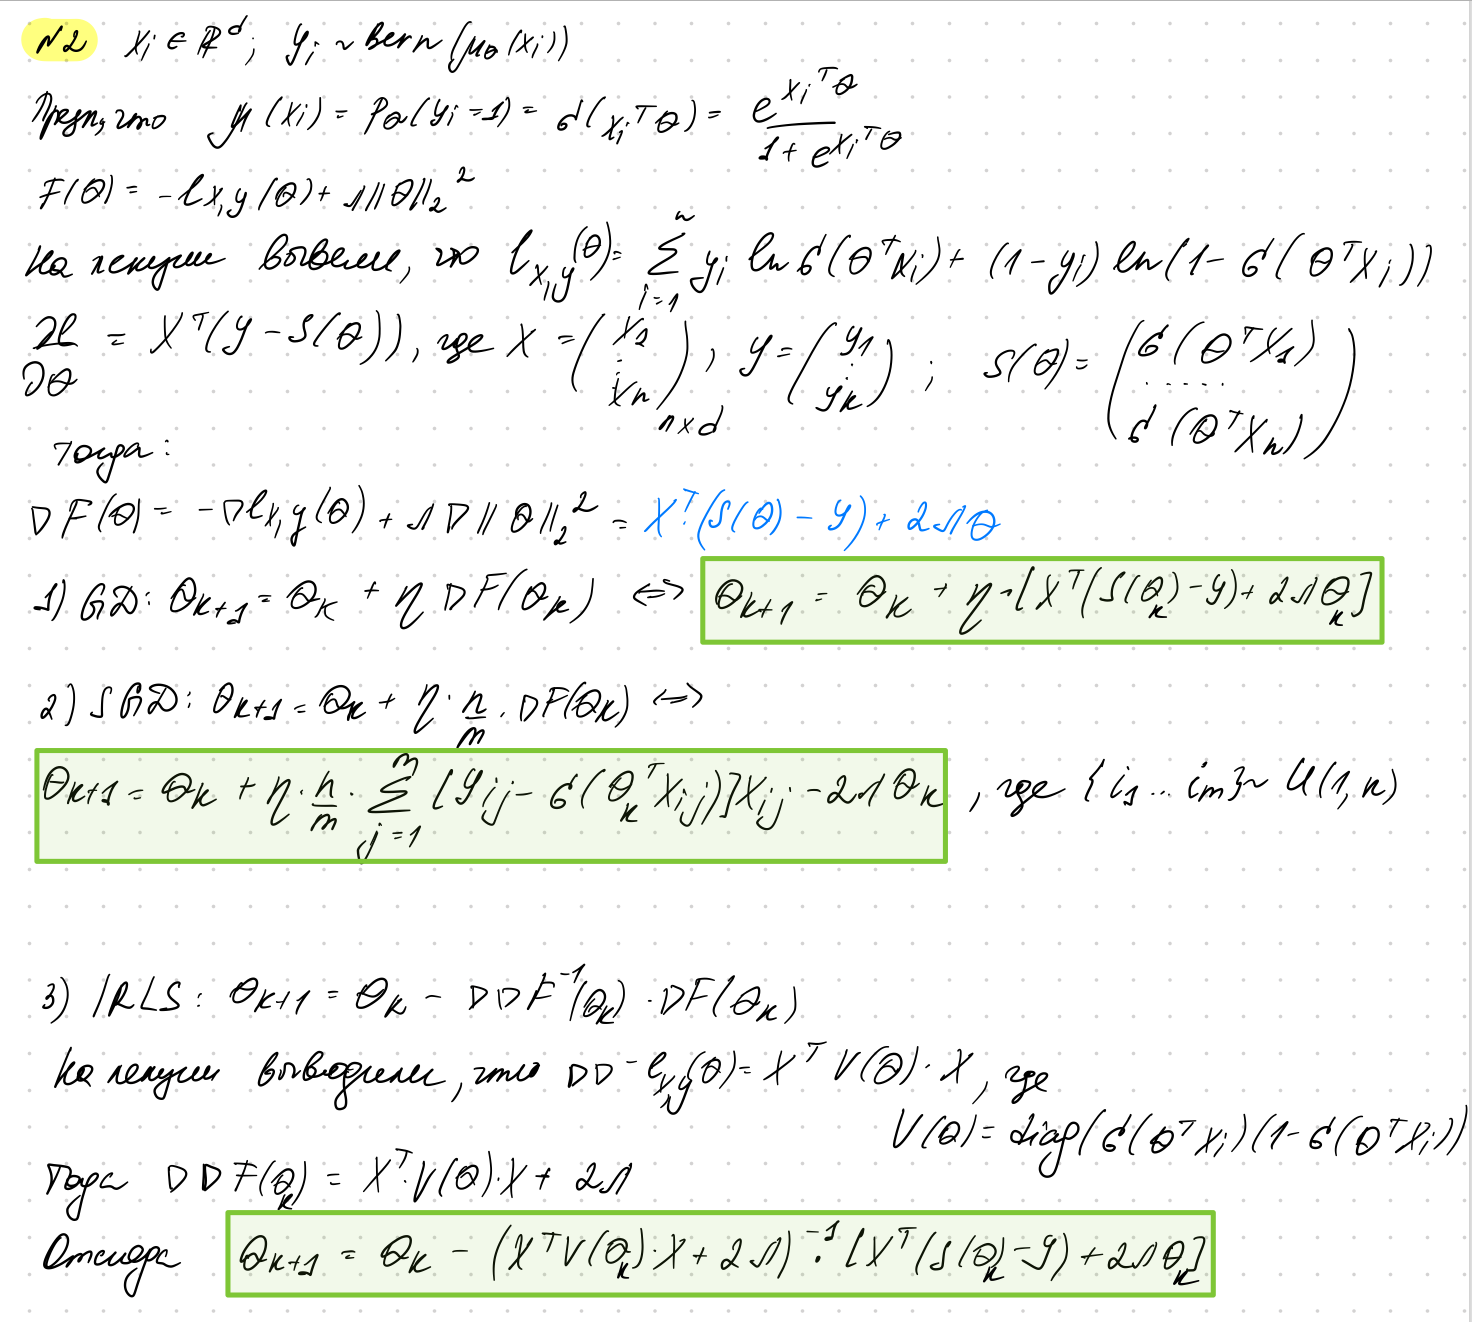

## Задача 3

**1.** Реализуйте логистическую регрессию с регуляризацией для трех вариантов поиска оценки параметров:
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск с размером батча 5-10;
* IRLS.

Для измерения времени работы **каждого** шага используйте 

`from time import time`

*Замечания.* 

1. Для чистоты эксперимента время шага внутри цикла нужно замерять от конца предыдущего шага до конца текущего, а не от начала текущего шага.
2. Иногда при подсчете сигмоиды и оптимизируемого функционала могут возникать вычислительные ошибки. Для их избежания существуют специальные трюки.
    * [How to Evaluate the Logistic Loss and not NaN trying](http://fa.bianp.net/blog/2019/evaluate_logistic/)
    * [The log-sum-exp trick in Machine Learning](https://www.xarg.org/2016/06/the-log-sum-exp-trick-in-machine-learning/)
    * [Exp-normalize trick](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)<br>
3. Трюки не обязательно реализовывать самостоятельно, можете воспользоваться функциями для них из `scipy`, `numpy`: 
    * [`scipy.special.logsumexp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html);
    * [`numpy.logaddexp`](https://numpy.org/doc/stable/reference/generated/numpy.logaddexp.html).
4. В методе IRLS можно добавить малый регуляризатор даже если регуляризации нет для исключения вычислительных проблем.

In [53]:
from scipy.special import expit, xlog1py

In [60]:
class LogisticRegression():
    '''
    Модель логистической регрессии. Имеет следующие гиперпараметры:
    
    :param alpha: параметр регуляризации. 
                     Если равно 0, то регуляризация не происходит.
    :param lr: константа, на которую домножаем градиент при обучении
    :param eps: ограничение на норму невязки в случае
                   если используется критерий criterion='eps'
    :param max_iter: ограничение на кол-во итераций в случае 
                        если используется критерий criterion='max_iter'
    :param method: если равно 'gd', то используется обычный градиентный спуск,
                   если равно 'sgd', то используется стохастический 
                        градиентный спуск,
                   если равно 'irls', то используется метод IRLS.
    :param criterion: если равно 'eps', то используем ограничение 
                        на норму невязки,
                      если равно 'max_iter', то используем ограничение 
                        на количество итераций
    :param fit_intercept: указывает, следует ли добавить константу в признаки
    :param save_history: указывает, следует ли сохранять историю обучения
    '''
    
    def __init__(self, alpha=0, lr=0.5, eps=1e-3, max_iter=1e5, 
                 method='gd', criterion='max_iter', 
                 fit_intercept=True, save_history=True):
        '''Создает модель и инициализирует параметры.'''
        
        criterion_error_msg = 'выбран неправильный критерий остановки'
        assert criterion in ['max_iter', 'eps'], criterion_error_msg
        
        method_error_msg = 'выбран неправильный метод'
        assert method in ['gd', 'sgd', 'irls'], method_error_msg

        self.alpha = alpha
        self.lr = lr
        self.eps = eps
        self.max_iter = int(max_iter)
        self.criterion = criterion
        self.method = method
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history = [[], []]  # для хранения истории обучения
        self.weights = None
        self.threshold = 0.5
        self.batch_size = 2**3

    @staticmethod
    def _sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def _logloss_gradient(X, y, probability):
        return np.dot(X.T, (y - probability))
    
    def _regul_gradient(self):
        return 2*self.alpha*self.weights
    
    def _logloss_2_gradient(self, X, probability):
        return X.T.dot(np.diag(probability*(1 - probability))).dot(X)
    
    def _regul_2_gradient(self):
        return 2*self.alpha
    
    @staticmethod
    def logsig(x):
        """Compute the log-sigmoid function component-wise."""
        out = np.zeros_like(x)
        idx0 = x < -33
        out[idx0] = x[idx0]
        idx1 = (x >= -33) & (x < -18)
        out[idx1] = x[idx1] - np.exp(x[idx1])
        idx2 = (x >= -18) & (x < 37)
        out[idx2] = -np.log1p(np.exp(-x[idx2]))
        idx3 = x >= 37
        out[idx3] = -np.exp(-x[idx3])
        return out 

    def stable_loss(self, X, y):
        z = np.dot(X, self.weights)
        res = np.mean((1 - y) * z - self.logsig(z)) + np.mean(2*self.alpha*self.weights)
        return res
    
    def prepare_batch(self, X):
        indices = random.sample(range(0, X.shape[0]), self.batch_size)
        return X[indices]
    
    def _add_intercept(self, X):
        '''
        Добавляем свободный коэффициент к нашей модели. 
        Это происходит путем добавления вектора из 1 к исходной матрице.
        
        :param X: исходная матрица признаков
        :return: матрица X с добавленным свободным коэффициентов
        '''
        
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1)
        X_copy[:, :-1] = X

        return X_copy
        
    def fit(self, X, y):
        '''
        Обучает модель логистической регресии с помощью выбранного метода,
        пока не выполнится критерий остновки self.criterion.
        Также, в случае self.save_history=True, добавляет в self.history 
        текущее значение оптимизируемого функционала 
        и время обновления коэффициентов. 
        
        :param X: матрица признаков
        :param Y: истинные метки
        '''
        
        assert X.shape[0] == y.shape[0]

        if self.fit_intercept:  # добавляем свободный коэфициент
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()
            
        if self.method == 'sgd':
            X_batch = self.prepare_batch(X_copy)
            y = self.prepare_batch(y)
    
        self.weights = np.zeros(X_copy.shape[1])
        
        n_iter = 0
        start = time()
        
        if self.method == 'gd':
            for i in range(self.max_iter):
                # считаем коэффициенты
                linear_pred = np.dot(X_copy, self.weights)
                probability = self._sigmoid(linear_pred)
                partial_w = (1 / X_copy.shape[0]) * (self._logloss_gradient(X_copy, y, probability) + 
                                                     self._regul_gradient())
                weights_recalculated = self.weights + (self.lr * partial_w)
                
                # если критерий eps, то остановится по невязке, если нет, то совершит max_iter циклов
                if self.criterion == 'eps' and \
                        np.abs(lg.norm(self.weights) - lg.norm(weights_recalculated)) < self.eps and i != 0:
                    n_iter = i + 1
                    break
                self.weights = weights_recalculated
                n_iter += 1
                self.history[0].append(self.stable_loss(X_copy, y))
                self.history[1].append(time()-start)
                start = time()
                
        elif self.method == 'sgd':
            for i in range(self.max_iter):
                # делаем батч
                X_batch = self.prepare_batch(X_copy)
                y = self.prepare_batch(y)
                
                # считаем коэффициенты
                print(X_batch.shape, self.weights.shape)
                linear_pred = np.dot(X_batch, self.weights)
                probability = self._sigmoid(linear_pred)
                partial_w = (1 / X_batch.shape[0]) * (self._logloss_gradient(X_batch, y, probability) + 
                                                     self._regul_gradient())
                weights_recalculated = self.weights + (self.lr * self.batch_size * partial_w)
                
                # если критерий eps, то остановится по невязке, если нет, то совершит max_iter циклов
                if self.criterion == 'eps' and \
                        np.abs(lg.norm(self.weights) - lg.norm(weights_recalculated)) < self.eps and i != 0:
                    n_iter = i + 1
                    break
                self.weights = weights_recalculated
                n_iter += 1
                self.history[0].append(self.stable_loss(X_batch, y))
                self.history[1].append(time()-start)
                start = time()
                
        elif self.method == 'irls':
            for i in range(self.max_iter):
                # считаем коэффициенты
                linear_pred = np.dot(X_copy, self.weights)
                probability = self._sigmoid(linear_pred)

                fg = self._logloss_gradient(X_copy, y, probability) + self._regul_gradient()
                sg = self._logloss_2_gradient(X_copy, probability) + self._regul_2_gradient()                        
                
                partial_w = (1 / X_copy.shape[0]) * np.linalg.pinv(sg).dot(fg)
                
                weights_recalculated = self.weights + (self.lr * partial_w)
                # если критерий eps, то остановится по невязке, если нет, то совершит max_iter циклов
                if self.criterion == 'eps' and \
                        np.abs(lg.norm(self.weights) - lg.norm(weights_recalculated)) < self.eps and i != 0:
                    n_iter = i + 1
                    break
                self.weights = weights_recalculated
                n_iter += 1
                self.history[0].append(self.stable_loss(X_copy, y))
                self.history[1].append(time()-start)
                start = time()

        self.coef_ = self.weights[:-1] if self.fit_intercept else self.weights # коэффициенты модели
        self.intercept_ = self.weights[-1] if self.fit_intercept else None # свободный коэффициент
        self.n_iter_ = n_iter if self.criterion == 'eps' else self.max_iter # произведенное число итераций
        
        return self

    
    def predict(self, X):
        '''
        Применяет обученную модель к данным 
        и возвращает точечное предсказание (оценку класса).
        
        :param X: матрица признаков
        :return: предсказание с размерностью (n_test, )
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.weights.shape[0]

        linear_pred = np.dot(X_copy, self.weights)
        prob_predictions = self._sigmoid(linear_pred)
        return [1 if i > self.threshold else 0 for i in prob_predictions]
        
    def predict_proba(self, X):
        '''
        Применяет обученную модель к данным
        и возвращает предсказание вероятности классов 0 и 1.
        
        :param X: матрица признаков
        :return: вероятности предсказания с размерностью (n_test, 2)
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()


        assert X_copy.shape[1] == self.weights.shape[0]

        linear_pred = np.dot(X_copy, self.weights)
        prob_predictions = self._sigmoid(linear_pred)
        
        return prob_predictions

Рассмотрим игрушечный датасет на $30$ признаков `load_breast_cancer` из библиотеки `sklearn`. Это относительно простой для бинарной классификации датасет по диагностике рака молочной железы.

Ради интереса можно прочитать описание признаков.

In [56]:
dataset = load_breast_cancer()
dataset['DESCR'].split('\n')[11:31]

['    :Attribute Information:',
 '        - radius (mean of distances from center to points on the perimeter)',
 '        - texture (standard deviation of gray-scale values)',
 '        - perimeter',
 '        - area',
 '        - smoothness (local variation in radius lengths)',
 '        - compactness (perimeter^2 / area - 1.0)',
 '        - concavity (severity of concave portions of the contour)',
 '        - concave points (number of concave portions of the contour)',
 '        - symmetry',
 '        - fractal dimension ("coastline approximation" - 1)',
 '',
 '        The mean, standard error, and "worst" or largest (mean of the three',
 '        worst/largest values) of these features were computed for each image,',
 '        resulting in 30 features.  For instance, field 0 is Mean Radius, field',
 '        10 is Radius SE, field 20 is Worst Radius.',
 '',
 '        - class:',
 '                - WDBC-Malignant',
 '                - WDBC-Benign']

Разделим нашу выборку на обучающую и тестовую:

In [57]:
X, Y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

При использовании регуляризации данные необходимо нормализовать. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`. 

In [58]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

**2.** Теперь обучите три модели логистической регрессии без регуляризации с помощью методов
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск;
* IRLS.

Постройте график, на котором нанесите три кривые обучения, каждая из которых отображает зависимость оптимизируемого функционала от номера итерации метода. **Функционал должен быть одинаковый для всех моделей: логарифм правдоподобия без минусов**. Нарисуйте также график зависимости этого функционала от времени работы метода. Сделайте выводы. Что будет при обучении на датасете, в котором больше строк, а число столбцов останется прежним?

*Замечания:* 
* Все графики должны быть информативны, с подписанными осями и т.д..
* Для чистоты эксперимента желательно не запускать в момент обучения другие задачи и провести обучение несколько раз, усреднив результаты.

In [ ]:
# model_gd = LogisticRegression(method='gd', criterion='max_iter')
model_gsd = LogisticRegression(method='sgd', criterion='max_iter')
# model_irls = LogisticRegression(method='irls', criterion='max_iter')

# model_gd.fit(X_train_stand, y_train)
model_gsd.fit(X_train_stand, y_train)
# model_irls.fit(X_train_stand, y_train)

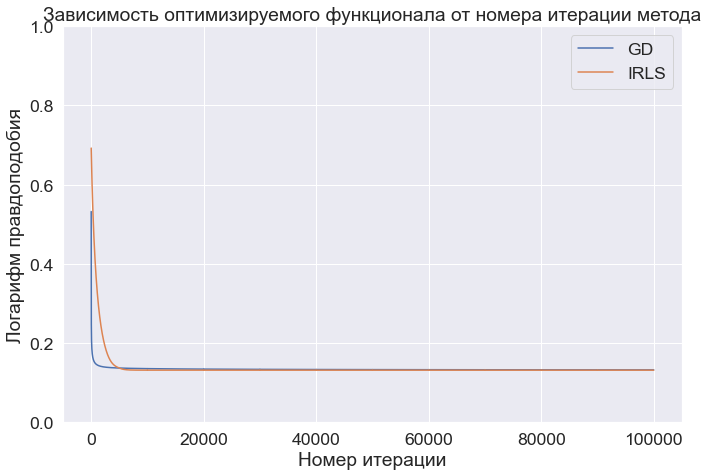

In [488]:
plt.figure(figsize=(10, 7))

plt.plot(np.arange(1, model_gd.n_iter_+1), model_gd.history[0], label='GD')
plt.plot(np.arange(1, model_irls.n_iter_+1), model_irls.history[0], label='IRLS')

plt.ylim((0, 1))

plt.title('Зависимость оптимизируемого функционала от номера итерации метода')
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм правдоподобия')

plt.legend()
plt.tight_layout()

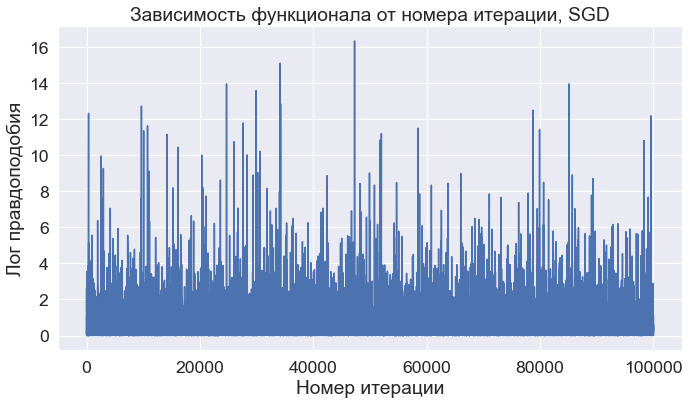

In [487]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, model_gsd.n_iter_+1), model_gsd.history[0], label='SGD')
plt.title('Зависимость функционала от номера итерации, SGD')
plt.xlabel('Номер итерации')
plt.ylabel('Лог правдоподобия')
plt.tight_layout();

In [318]:
plt.rcParams['agg.path.chunksize'] = 10000

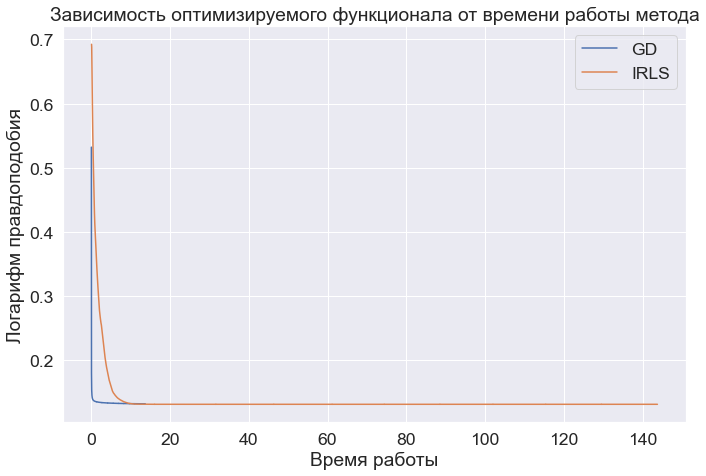

In [489]:
plt.figure(figsize=(10, 7))

plt.plot(np.cumsum(model_gd.history[1]), model_gd.history[0], label='GD')
plt.plot(np.cumsum(model_irls.history[1]), model_irls.history[0], label='IRLS')

plt.title('Зависимость оптимизируемого функционала от времени работы метода')
plt.xlabel('Время работы')
plt.ylabel('Логарифм правдоподобия')

plt.legend()
plt.tight_layout()

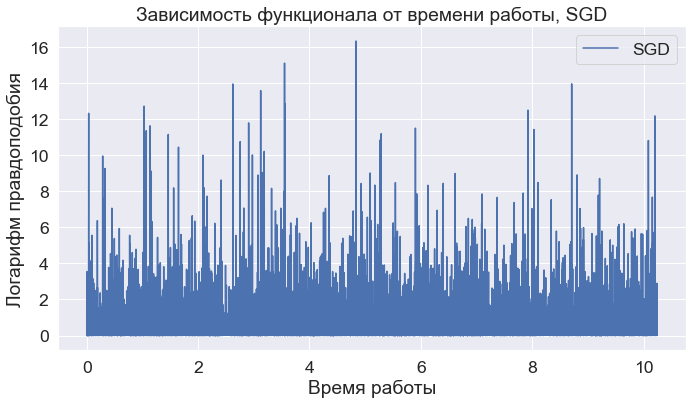

In [491]:
plt.figure(figsize=(10, 6))

plt.plot(np.cumsum(model_gsd.history[1]), model_gsd.history[0], label='SGD')

plt.title('Зависимость функционала от времени работы, SGD')
plt.xlabel('Время работы')
plt.ylabel('Логарифм правдоподобия')

plt.legend()
plt.tight_layout();

*Теоретически, фунционал должен убывать с ростом кол-ва итераций и времени, так как ищется минимум. Это наблюдается в методах градиентного спуска и IRLS. Стохастический градиентный спуск я изобразила отдельно, так как вместе с ним общиц график очень неинформативен из-за большого разброса значений функционала. То что SGD хуже всего сходится логично, так чем меньше батч, тем хуже будет точность предсказаний, а в задании указано поставить размер 5-10. Если датасет будет больше, то SGD будет предсказывать еще хуже, на точность других повлиять не должно, но работать будет дольше.*

**3.** Сравните два реализованных критерия остановки по количеству проведенных итераций: 
* евклидова норма разности текущего и нового векторов весов стала меньше, чем $10^{-4}$;
* ограничение на число итераций (например, $10000$). 

Используйте градиентный спуск.

In [503]:
model_gd_eps = LogisticRegression(method='gd', criterion='eps', eps=1e-4)
model_gd_iter = LogisticRegression(method='gd', criterion='max_iter')

model_gd_eps.fit(X_train_stand, y_train)
model_gd_iter.fit(X_train_stand, y_train)

In [505]:
model_gd_eps.n_iter_

35107

In [506]:
preds_gd_eps = model_gd_eps.predict(X_test_stand)
preds_gd_iter = model_gd_iter.predict(X_test_stand)


print('Accuracy, epsilon criterion:', accuracy_score(y_test, preds_gd_eps))
print('Confusion matrix, epsilon criterion: \n', confusion_matrix(y_test, preds_gd_eps))

print('Accuracy, iter criterion:', accuracy_score(y_test, preds_gd_iter))
print('Confusion matrix, iter criterion: \n', confusion_matrix(y_test, preds_gd_iter))

Accuracy, epsilon criterion: 0.9210526315789473
Confusion matrix, epsilon criterion: 
 [[36  7]
 [ 2 69]]
Accuracy, iter criterion: 0.9210526315789473
Confusion matrix, iter criterion: 
 [[36  7]
 [ 2 69]]


In [507]:
model_gd_eps.fit(X_train, y_train)
model_gd_iter.fit(X_train, y_train)

In [508]:
model_gd_eps.n_iter_

15763

In [509]:
preds_gd_eps = model_gd_eps.predict(X_test)
preds_gd_iter = model_gd_iter.predict(X_test)


print('Accuracy, epsilon criterion:', accuracy_score(y_test, preds_gd_eps))
print('Confusion matrix, epsilon criterion: \n', confusion_matrix(y_test, preds_gd_eps))

print('Accuracy, iter criterion:', accuracy_score(y_test, preds_gd_iter))
print('Confusion matrix, iter criterion: \n', confusion_matrix(y_test, preds_gd_iter))

Accuracy, epsilon criterion: 0.9210526315789473
Confusion matrix, epsilon criterion: 
 [[43  0]
 [ 9 62]]
Accuracy, iter criterion: 0.956140350877193
Confusion matrix, iter criterion: 
 [[43  0]
 [ 5 66]]


*Точность предсказания в градиентном спуске без регуляризации на __нестандартизированных__ данных получилась лучше при помощи ограничения на число итераций. При этом на стандартизованных данных точность получилась одинаковой.*


**4.** Рассмотрите как влияет размер шага (`learning rate`) на качество модели. Обучите каждую модель одинаковое число итераций (например, 10000), а затем посчитайте качество. Воспользуйтесь ограничением на число итераций в качестве критерия остановки, так как для больших `learning rate` у вас может не сойтись модель. Используйте стохастический градиентный спуск. Сделайте выводы.

In [510]:
lrs = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10]

In [543]:
lr_df = pd.DataFrame(columns=['Accuracy'], index=lrs)

In [545]:
for lr in lrs:
    model_sgd = LogisticRegression(method='sgd', criterion='max_iter', lr=lr, max_iter=1e4)
    model_sgd.fit(X_train_stand, y_train)
    preds_sgd = model_sgd.predict(X_test_stand)
    lr_df['Accuracy'][lr] = accuracy_score(y_test, preds_sgd)

In [546]:
lr_df

,Accuracy
0.00001,0.614035
0.00010,0.622807
0.00100,0.622807
0.01000,0.622807
0.10000,0.412281
0.20000,0.5
0.30000,0.561404
0.50000,0.535088
0.70000,0.482456
1.00000,0.526316


Постройте кривые обучения для различных `learning rate`. Не обязательно рассматривать все `learning rate`, так как их слишком много, и график будет нагроможден. Возьмите около половины из них. Какой `learning rate` лучше выбрать? Чем плохи маленькие и большие `learning rate`?

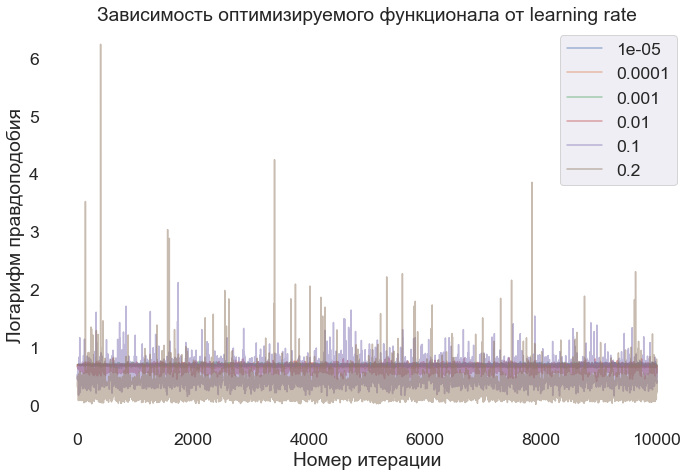

In [549]:
plt.figure(figsize=(10, 7))

for lr in lrs[0:6]:
    model_sgd = LogisticRegression(method='sgd', criterion='max_iter', lr=lr, max_iter=1e4)
    model_sgd.fit(X_train_stand, y_train)
    plt.plot(np.arange(1, model_sgd.n_iter_+1), model_sgd.history[0], label=lr, alpha=0.5)


plt.title('Зависимость оптимизируемого функционала от learning rate')
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм правдоподобия')

plt.tight_layout()
plt.legend()
plt.gca().set_facecolor('white');

*Теоретически, низкие learning rate дают большее accuracy, так как экстремум ищется медленнее, а слишком высокие дают слишком быструю сходимость, из-за чего может быть низкое качество. В целом, у меня это подтвердилось: точность наибольшая при меньших значениях, затем варьирует, но в целом падает. Из всех для конкретно этого метода и заданных параметров стоит взять __lr=0.01__, так как он дает макс точность и при этом максимальный среди других дающих ту же точность*

**5.** Рассмотрите несколько моделей, полученные при помощи GD, в которых установите не менее 5-ти различных коэффициентов регуляризации, а также модель без регуляризатора. Сравните, влияет ли наличие регуляризации на скорость сходимости и качество, сделайте выводы. Под качеством подразумевается значение какой-либо выбранной вами метрики качества классификации.

In [554]:
alphas = [0, 1e-3, 1e-2, 1e-1, 1, 10, 100]
alphas_df = pd.DataFrame(columns=['Accuracy', 'n_iters'], index=alphas)

for alpha in alphas:
    model_gd = LogisticRegression(method='gd', criterion='eps', alpha=alpha, max_iter=1e4)
    model_gd.fit(X_train_stand, y_train)
    preds_gd = model_gd.predict(X_test_stand)
    alphas_df['Accuracy'][alpha] = accuracy_score(y_test, preds_gd)
    alphas_df['n_iters'][alpha] = model.n_iter_

In [555]:
alphas_df

,Accuracy,n_iters
0.000,0.929825,100000
0.001,0.929825,100000
0.010,0.929825,100000
0.100,0.921053,100000
1.000,0.903509,100000
10.000,0.912281,100000
100.000,0.377193,100000


*В моем случае, коэффициент регуляризации на сходимость не повлиял, везде одинаковое количество итераций. При этом качество немного снижается до alpha=10, и затем резко снижается при alpha=100. При этом видим, что максимальная точность у alpha=0 и низких значений. Это может означать, что регуляризация в этом случае не нужна.*

**6.** Возьмите лучшую модель с предыдущего шага. В исходной выборке оставьте только два произвольных признака и обучите на них модель без использования свободного параметра. Визуализируйте предсказания вероятностей класса $1$ для модели.

In [605]:
X_train_std_mini = X_train_stand[:, :2]
X_test_std_mini = X_test_stand[:, :2]

model = LogisticRegression(method='gd', criterion='eps', alpha=0, max_iter=1e4, fit_intercept=False)

model.fit(X_train_std_mini, y_train)

In [606]:
preds_gd = model.predict(X_test_std_mini)
accuracy_score(y_test, preds_gd)

0.8947368421052632

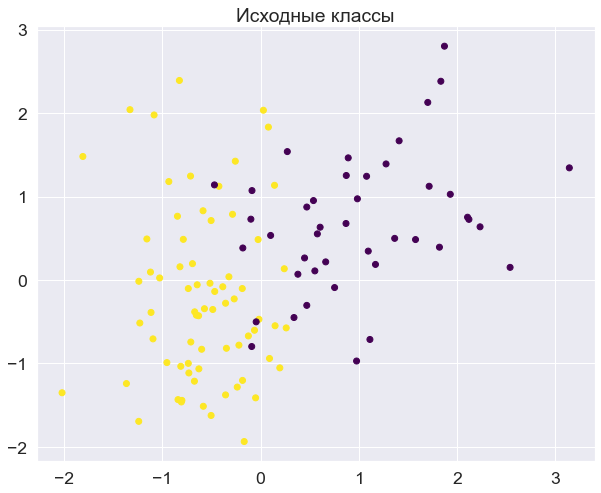

In [607]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test_std_mini[:, 0], X_test_std_mini[:, 1], c=y_test, cmap='viridis')
plt.title('Исходные классы');

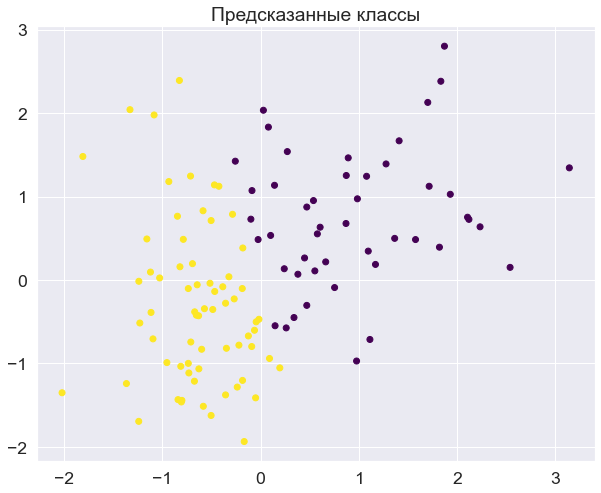

In [608]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test_std_mini[:, 0], X_test_std_mini[:, 1], c=preds_gd, cmap='viridis')
plt.title('Предсказанные классы');

**Вывод:** *В задаче посмотрели, как различные гиперпараметры влияют на качество классификации и скорость схождения логистической регрессии. Скорость обучения и параметр регуляризации сильно влияют на точность, параметр критерий остановки - не сильно. Так же сравнили результаты между методами - худший дал стохастический градиентный спуск.*

## Задача 4

Обобщите метод IRLS на случай многоклассовой классификации, используя стратегию с softmax-функцией

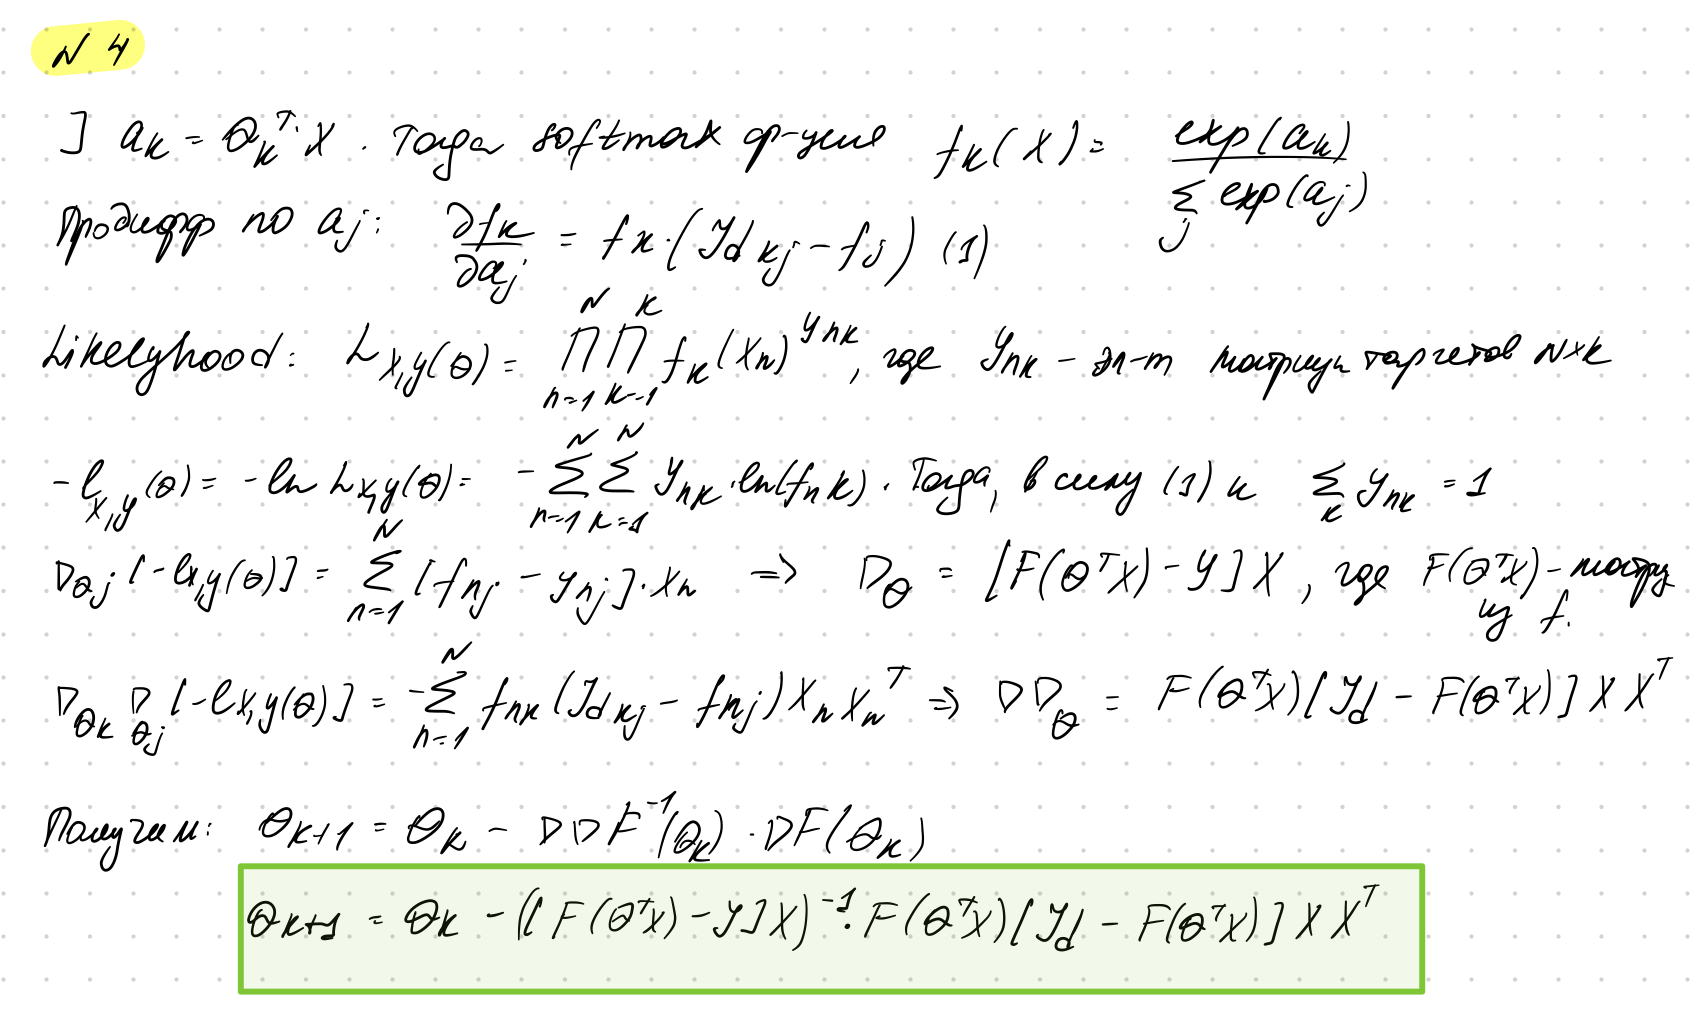

## Задача 5.

В этой задаче вам предлагается расмотреть и сравнить две стратегии поиска оптимальных значений некоторого функционала: GridSearch и RandomSearch. В реальной жизни значение функционала &mdash; это значение целевой метрики качества, а оптимизация идет по гиперпараметрам некоторой модели машинного обучения. Коротко напомним, в чем же заключается каждая стратегия.

* GridSearch &mdash; полный перебор по сетке. Суть перебора по сетке заключается в следующем: вы задаете область значений гиперпараметров, которые хотите оптимизировать, обучаете все модели, которые возможно получить в рамках заданного пространства поиска гиперпараметров. Затем выбираете из данных моделей ту, которая дала наилучшее качество на кросс-валидации.
* RandomSearch &mdash; это стратегия, при которой рассматривается некоторая выборка из множества значений гиперпараметров. По умолчанию часто используется равномерное распределение. Лучшая модель выбирается так же на основе кросс-валидации.

Разберем сначала **одномерный случай**. Для этого рассмотрим следующую функцию.

In [4]:
def f(x):
    return 5.2 - 5/(1+(3*(x))**2) - np.cos(x)/5

Поcтройте график функции $f(x)$ на отрезке $[-20, 20]$. В чем его особенность?

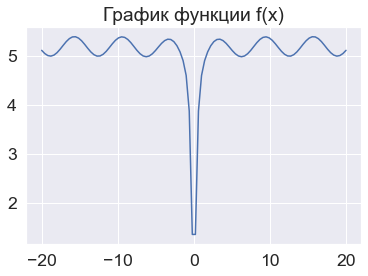

In [9]:
grid = np.linspace(-20, 20, 100)
y = f(grid)

plt.figure(figsize=(6, 4))
plt.plot(grid, y)
plt.title('График функции f(x)');

Подумайте, какие проблемы могут возникнуть при поиске минимума этой функции, если используется поиск по сетке?

**Ответ:** 
*Минимум функции в 0 достигается очень резко, а значит итеративно достичь минимума будет сложно, можно легко его проскочить. Результат будет сильно зависеть от сетки - например, если идти только по целым числам, то минимум точно найдется. А вот если по вещественным числам с большим расстоянием - не факт.*

Рассмотрим **поиск по сетке** и проведем вычислительный эксперимент. Для этого будем генерировать случайное смещение из $U[-0.5, 0.5]$, а затем рассматривать смещенную на $x_0$ сетку размера $n$ на отрезке $[-10, 10]$, после чего поиском по сетке искать оптимальное значение $f$.

In [25]:
# рассматриваемые размеры сеток
grid_size = np.arange(2, 1000)
n_experiments = 100  # количество экспериментов

In [26]:
# массив для минимумов по сетке для текущего эксперимента
grid_min_f_trace = []

for _ in tqdm(range(n_experiments)):
    # случайное смещение сетки на [-0.5, 0.5]
    x_0 = sps.uniform.rvs() - 1/2
    # массив для минимумов для текущего размера сетки
    grid_f_min = []
    # цикл по размеру сетки
    for n in grid_size:
        # сетка на [-10, 10] размера n
        grid = np.linspace(-10, 10, n)
        # найденный по сетке со смещением x_0 минимум функции f
        f_min = f(grid - x_0).min()
        # сохраним минимум для сетки размера n
        grid_f_min.append(f_min)
    # сохраним минимумы текущего эксперимента
    grid_min_f_trace.append(grid_f_min)

  0%|          | 0/100 [00:00<?, ?it/s]

Для нескольких экспериментов постройте графики значений минимума от количества точек в сетке. 
Для большей наглядности и информативности сразу **зафиксируйте диапазон значений по оси y**, а также отображайте графики в **логарифмическом масштабе**.

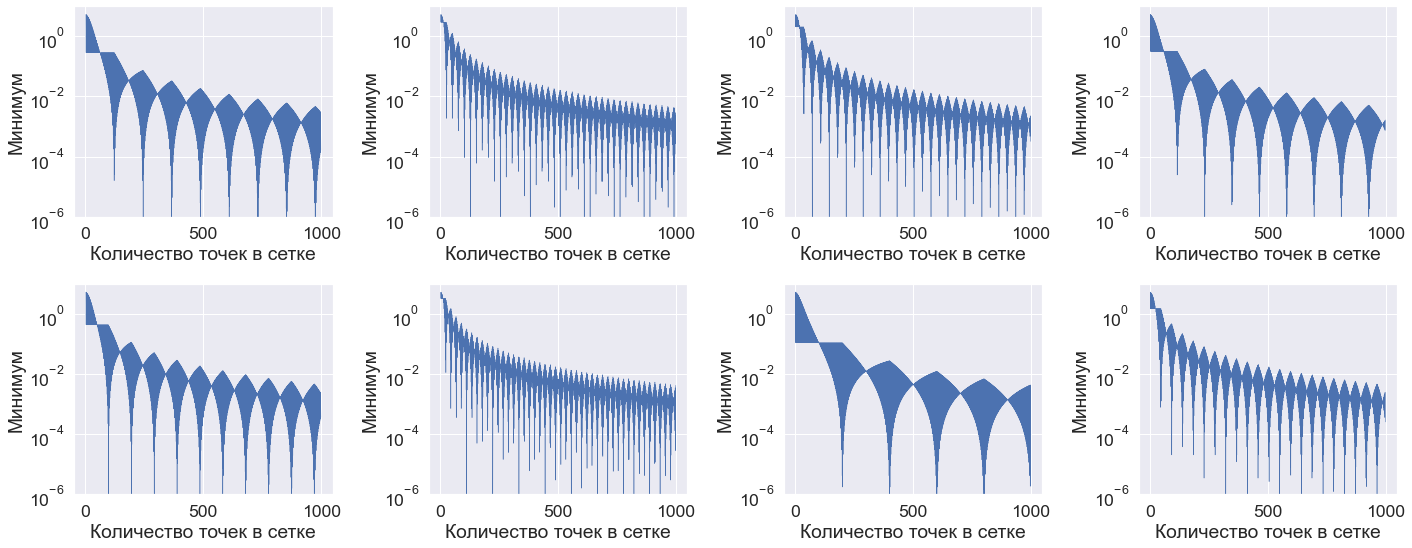

In [27]:
plt.figure(figsize=(20, 8))

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.plot(grid_size, grid_min_f_trace[i], lw=0.5)
    plt.xlabel('Количество точек в сетке')
    plt.ylabel('Минимум')
    plt.ylim((1e-6, 10))
    plt.yscale('log')
plt.tight_layout()

Теперь рассмотрим **случайный поиск**. Снова проведем вычислительный эксперимент. Обратите внимание, что случайные точки для эксперимента мы генерируем один раз.

In [28]:
# рассматриваемое количество случайных точек
random_size = np.arange(2, 1000)

In [30]:
# массив для минимумов для текущего эксперимента
random_min_f_trace = []

# цикл по экспериментам
for _ in tqdm(range(n_experiments)):
    # случайное смещение на [-0.5, 0.5]
    x_0 = sps.uniform.rvs() - 1/2
    # массив для минимумов для текущего количества точек
    random_min_f = []
    # сгенерируем случайные на [-10, 10] точки сразу
    points = sps.uniform(-10, 20).rvs(size=random_size.max())
    
    #цикл по количеству точек
    for n in random_size:
        x = points[:n]
        # найденный по первым n случайным точкам со смещением x_0 минимум функции f
        f_min = f(x - x_0).min()
        # сохранение результатов
        random_min_f.append(f_min)
        
    random_min_f_trace.append(random_min_f)

  0%|          | 0/100 [00:00<?, ?it/s]

Снова для нескольких экспериментов постройте графики значений минимума от количества точек при случайном поиске.

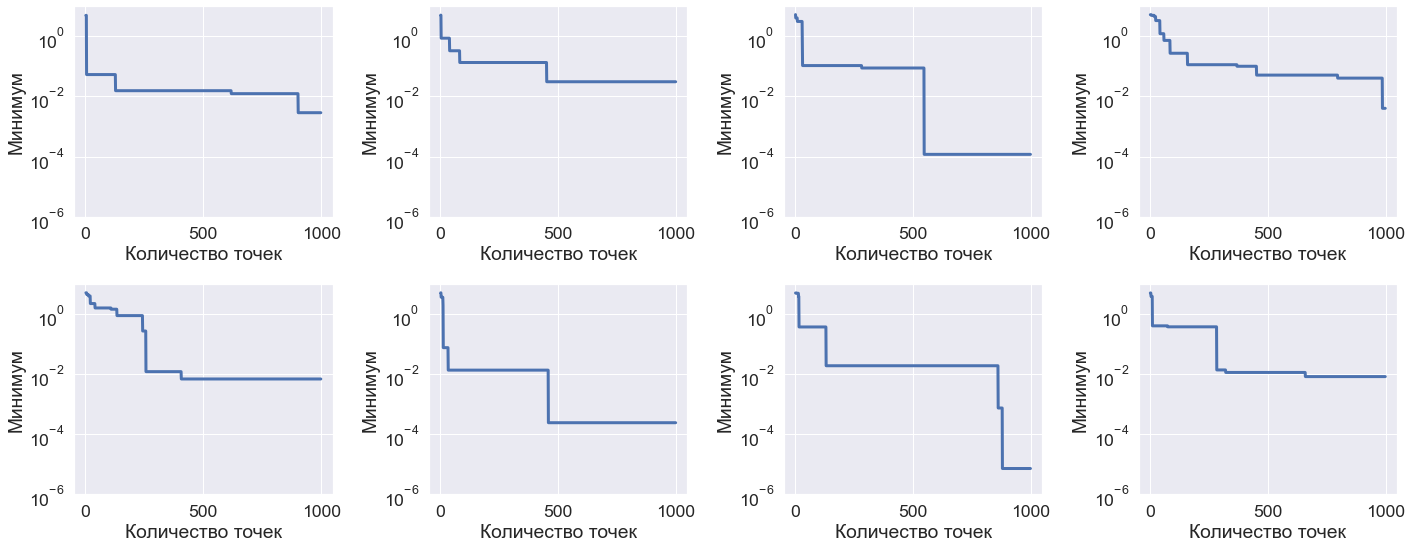

In [31]:
plt.figure(figsize=(20, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.plot(random_size, random_min_f_trace[i], lw=3)
    plt.xlabel('Количество точек')
    plt.ylabel('Минимум')
    plt.ylim((1e-6, 10))
    plt.yscale('log')
plt.tight_layout()

Сравним два метода. Для этого постройте график зависимости найденного минимума от количества точек (случайных или в сетке). Перед этим предварительно усредните результат по количеству экспериментов. Какие результаты у вас получились?

In [36]:
grid_min = np.mean(grid_min_f_trace, axis=0)
random_min = np.mean(random_min_f_trace, axis=0)

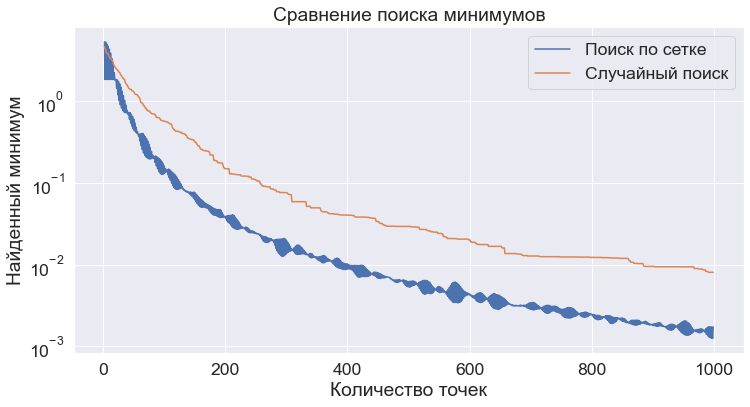

In [38]:
plt.figure(figsize=(12, 6))

plt.plot(grid_size, grid_min, label='Поиск по сетке')
plt.plot(grid_size, random_min, label='Случайный поиск')
plt.yscale('log')


plt.xlabel('Количество точек')
plt.ylabel('Найденный минимум')
plt.legend()
plt.title('Сравнение поиска минимумов');

*В целом, оба метода тем ближе к минимуму, чем больше точек в сетке. Но в среднем поиск по сетке лучше, так как сходится к 0 быстрее.*

Теперь расмотрим **двумерный случай**, для этого определим следующую функцию:

In [40]:
def f(x, y,):
    return 5.4 - 5/(1+(3*x)**2) - np.cos(x)/5 - np.cos(y)/5

Постройте тепловую карту значений этой функции на $[-20, 20]^2$.

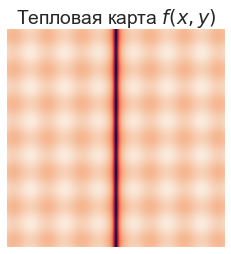

In [42]:
x = np.linspace(-20, 20, n).reshape((1, -1))
y = x.T

plt.imshow(f(x, y))
plt.axis('off');
plt.title('Тепловая карта $f(x,y)$');

Проведите эксперимент, аналогичный одномерному случаю. В случае поиска по сетке рассмотрите сетку размера $n$ на $[-10, 10]$ по каждой координате. Таким образом, общий размер сетки будет $n^2$. Для ускорения вычислений в случае случайного поиска будет достаточно рассмотреть только такое количество точек, которое соответствует рассмотренным размерам сетки (т.е. квадраты чисел).

Сравните результат с полученным ранее. Сделайте вывод.

In [43]:
# рассматриваемые размеры сеток
grid_size = np.arange(2, 500)

grid_min_f_trace = []
for _ in tqdm(range(n_experiments)):
    x_0 = sps.uniform.rvs() - 0.5
    y_0 = sps.uniform.rvs() - 0.5
    grid_f_min = []
    for n in grid_size:
        x_grid = np.linspace(-10, 10, n).reshape((1, -1))
        y_grid = x_grid.T
        f_min = f(x_grid - x_0, y_grid - y_0).min()
        grid_f_min.append(f_min)
    grid_min_f_trace.append(grid_f_min)

  0%|          | 0/100 [00:00<?, ?it/s]

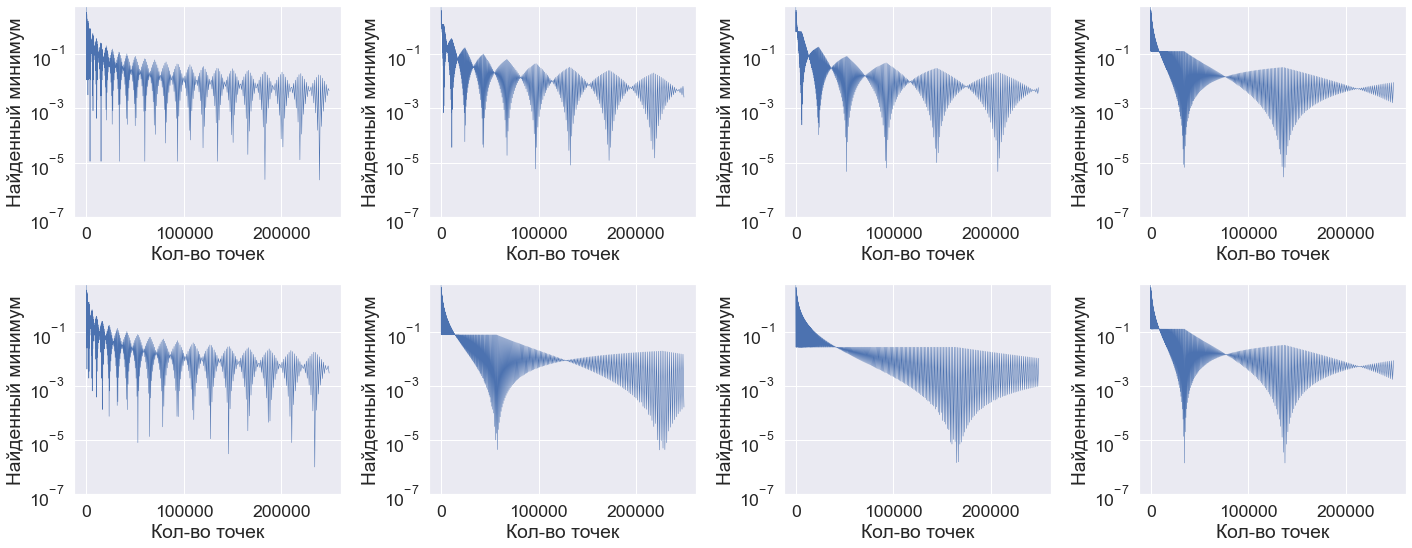

In [44]:
plt.figure(figsize=(20, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.plot(grid_size**2, grid_min_f_trace[i], lw=0.5)
    plt.xlabel('Кол-во точек')
    plt.ylabel('Найденный минимум')
    plt.ylim((1e-7, 6))
    plt.yscale('log')
plt.tight_layout()

In [45]:
# рассматриваемое количество точек
random_size = np.arange(2, 250000)
random_min_f_trace = []

for _ in tqdm(range(n_experiments)):
    x_0 = sps.uniform.rvs() - 0.5
    y_0 = sps.uniform.rvs() - 0.5
    random_min_f = []
    points_x = sps.uniform(loc=-10, scale=20).rvs(size=random_size.max())
    points_y = sps.uniform(loc=-10, scale=20).rvs(size=random_size.max())
    for n in random_size[grid_size**2]:
        x = points_x[:n]
        y = points_y[:n]
        f_min = f(x - x_0, y - y_0).min()
        random_min_f.append(f_min)
    random_min_f_trace.append(random_min_f)

  0%|          | 0/100 [00:00<?, ?it/s]

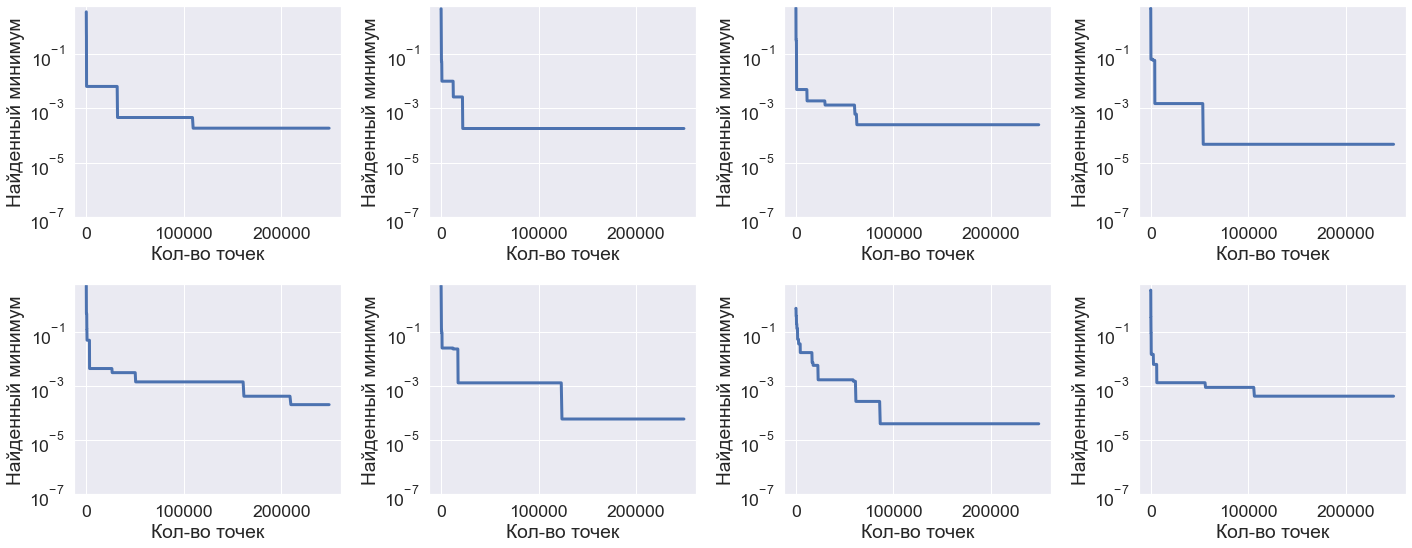

In [47]:
plt.figure(figsize=(20, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.plot(random_size[grid_size**2], random_min_f_trace[i], lw=3)
    plt.xlabel('Кол-во точек')
    plt.ylabel('Найденный минимум')
    plt.ylim((1e-7, 6))
    plt.yscale('log')
plt.tight_layout();

In [48]:
grid_min_f_mean = np.mean(grid_min_f_trace, axis=0)
random_min_f_mean = np.mean(random_min_f_trace, axis=0)

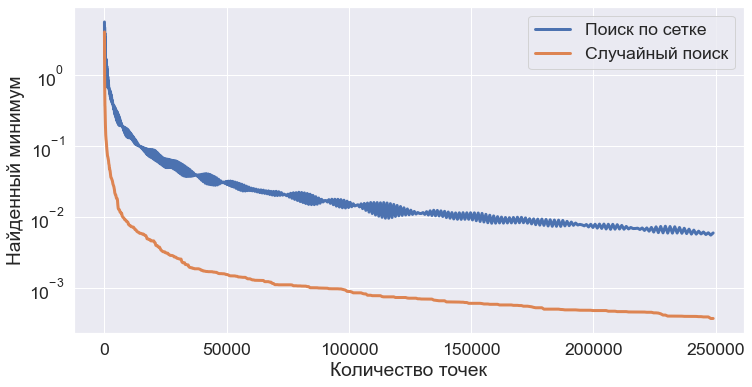

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(grid_size**2, grid_min_f_mean, lw=3, label='Поиск по сетке')
plt.plot(random_size[grid_size**2], random_min_f_mean, lw=3, label='Случайный поиск')
plt.xlabel('Количество точек')
plt.ylabel('Найденный минимум')
plt.legend()
plt.yscale('log');

**Вывод:** *В случае двумерного аргумента случайный поиск быстрее сходится к минимуму, чем grid search.*